In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
import scipy.io
from PIL import Image
import warnings
import random
from sklearn.cluster import KMeans
import zlib

Populating the interactive namespace from numpy and matplotlib


# Initial Setup

In [129]:
clusters = 100
picture = "Lenna.png"

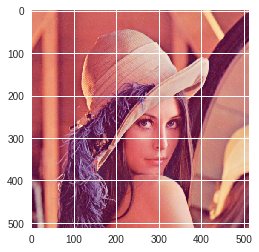

In [130]:
pic = scipy.misc.imread(picture)
original = pic
plt.imshow(pic) # Original image 
dimensions = pic.shape
components = dimensions[-1]
pic = pic.reshape(-1 , components)
size_of_image = tuple(dimensions[:2])

In [131]:
def point_select(n,X,points):
    dists = [0]*n;
    
    for i in range(n):
        dists[i] = sum((np.array(X)-np.array(points[i]))**2)
    
    smallest = min(dists);
    for i in range(n):
        if smallest==dists[i]:
            return i

# Encoding The Image

In [132]:
kmeans = KMeans(n_clusters=clusters).fit(pic)
points = kmeans.cluster_centers_

In [133]:
new_image = []

for i in xrange(pic.shape[0]):
    new_image.append(point_select(clusters,pic[i],points))
    
new_image = np.array(new_image)

In [134]:
new_image = new_image.astype(uint8)
new_image = new_image.reshape(size_of_image)

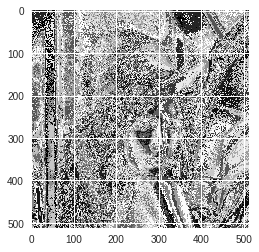

In [144]:

plt.imshow(new_image.reshape(512,512)) # Compressed Image
new_image = new_image.reshape((size_of_image[0]*size_of_image[1],1))

new_image = new_image.astype(uint8)
points = points.astype(uint8)

numpy.savez_compressed("compressed",array1=new_image,array2=points,array3=list(dimensions))

However , for transmitting the image , we will be storing the compressed image as a .gz file which ensures minimum data loss while transmission.

# Reconstruction Of Image

Now we will attempt to reconstruct the image only using the compressed file we obtained during the encoding stage.

In [136]:
data = numpy.load("compressed.npz")
compressed_image = data['array1']
centroids = data['array2']
dimension = tuple(data['array3'])
clusters = len(centroids)

In [137]:
build = [] # Reconstructing our image
for i in xrange(compressed_image.shape[0]):
    build.append(centroids[compressed_image[i][0]])
build = np.array(build)
build = build.reshape(dimension).astype(uint8)

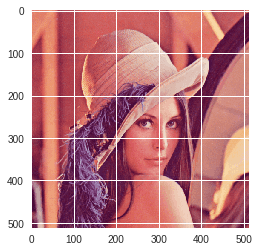

In [150]:
plt.imshow(build)
im = Image.fromarray(build)
im.save("decode.png")

In [152]:
im = Image.fromarray(build)
im.save("decode.jpg") # Apply PIL module's JPEG compression algorithm to further reduce size